# CIFAR10 image classification

The CNN is composed of two layers of convolution with 64 kernels each, followed by two fully connected layers that have 128 and 10 units, respectively. Pooling layers are used to reduce the dimensions of the feature maps of convolution layers.

 Parameter are also tuned
• Increasing the number of epochs generally increases the accuracy and lowers the loss
• Increasing the number of layers increases the accuracy
• Increasing the number of neurons per layer also increases the accuracy

In [ ]:
raise SystemExit("Stop right there!");

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# System
import os

# Mathematical operations and data manipulation
import numpy as np

# Modelling
from tensorflow.keras.datasets import cifar10
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

# Plotting
import matplotlib.pyplot as plt

%matplotlib inline

print("Tensorflow version:", tf.__version__)
print("Keras version:", keras.__version__)

Tensorflow version: 2.4.1
Keras version: 2.4.3


In [2]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

<a id="loading-data"></a>
## Loading dataset

The CIFAR-10 dataset (Canadian Institute for Advanced Research) is composed of 60,000 images of 10 different classes: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

In [3]:
# Loading the dataset's train and test data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [4]:
print("X_train Shape: {}".format(X_train.shape))
print("X_test Shape: {}".format(X_test.shape))
print("Y_train Shape: {}".format(Y_train.shape))
print("Y_test Shape: {}".format(Y_test.shape))

X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
Y_train Shape: (50000, 1)
Y_test Shape: (10000, 1)


In [5]:
# Reshaping  2D to 1D
Y_train = Y_train.reshape(
    -1,
)
Y_test = Y_test.reshape(
    -1,
)

<a id="exploring-data"></a>
## Exploring dataset

In [6]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

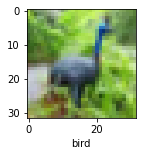

In [7]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])


plot_sample(X_train, Y_train, 6)

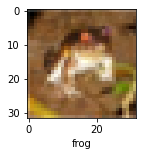

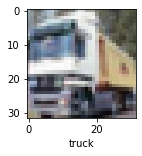

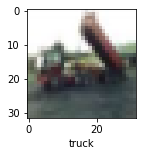

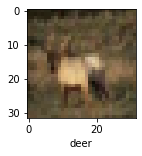

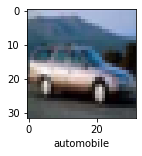

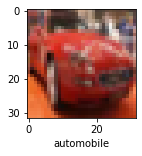

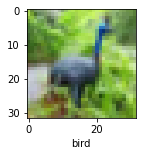

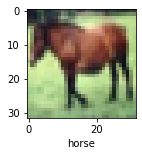

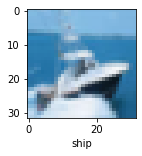

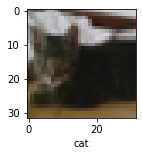

In [8]:
for i in range(10):
    plot_sample(X_train, Y_train, i)

<a id="generators"></a>
## Data generators

In [9]:
# Instantiating two ImageDataGenerator classes: all the image pixels
# are in a range from 0 to 255, use data augmentation for train dataset
data_gen_train = ImageDataGenerator(
    rescale=1.0 / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
data_gen_valid = ImageDataGenerator(rescale=1.0 / 255)

batch_size = 16
img_height = 32
img_width = 32

# Create data generators
train_generator = data_gen_train.flow(X_train, Y_train, batch_size=batch_size)
valid_generator = data_gen_valid.flow(X_test, Y_test, batch_size=batch_size)

<a id="model"></a>
## Training base model

In [10]:
# Setting 8 as the seed for numpy and tensorflow
np.random.seed(8)
tf.random.set_seed(8)

In [11]:
# Instantiate a tf.keras.Sequential() class
model = tf.keras.Sequential(
    [
        layers.Conv2D(
            32, 3, activation="relu", input_shape=(img_height, img_width, 3)
        ),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(128, 3, activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [12]:
optimizer = tf.keras.optimizers.Adam(0.001)

In [13]:
# Providing training parameters using the compile method
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"],
)

In [14]:
# Inspecting the model configuration using the summary function
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0

In [15]:
# Train the model by calling the fit method
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=len(X_test) // batch_size,
)

Epoch 1/20
3125/3125 [==============================] - 226s 72ms/step - loss: 1.8943 - accuracy: 0.2881 - val_loss: 1.3835 - val_accuracy: 0.5015
Epoch 2/20
3125/3125 [==============================] - 231s 74ms/step - loss: 1.5147 - accuracy: 0.4474 - val_loss: 1.3152 - val_accuracy: 0.5396
Epoch 3/20
3125/3125 [==============================] - 225s 72ms/step - loss: 1.4232 - accuracy: 0.4845 - val_loss: 1.2126 - val_accuracy: 0.5869
Epoch 4/20
3125/3125 [==============================] - 233s 74ms/step - loss: 1.3581 - accuracy: 0.5071 - val_loss: 1.2017 - val_accuracy: 0.5908
Epoch 5/20
3125/3125 [==============================] - 232s 74ms/step - loss: 1.3336 - accuracy: 0.5223 - val_loss: 1.1047 - val_accuracy: 0.6105
Epoch 6/20
3125/3125 [==============================] - 225s 72ms/step - loss: 1.2782 - accuracy: 0.5466 - val_loss: 1.1320 - val_accuracy: 0.6090
Epoch 7/20
3125/3125 [==============================] - 210s 67ms/step - loss: 1.2562 - accuracy: 0.5509 - val_loss: 1

<a id="statistics"></a>
## Statistics base model

In [16]:
# Test the model by calling the evaluate() function
evaluation = model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 168.2624 - accuracy: 0.3406


[168.26243591308594, 0.34060001373291016]

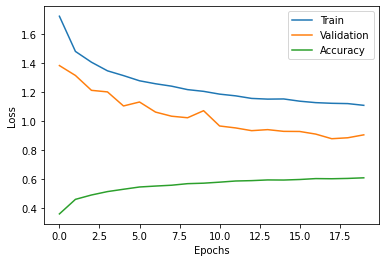

In [17]:
def plotloss(history):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.plot(history.history["accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["Train", "Validation", "Accuracy"])
    plt.show()


plotloss(history)

<a id="modelb"></a>
## Tuned model with batch normalization

In [21]:
model_b = tf.keras.Sequential(
    [
        layers.Conv2D(
            64,
            (4, 4),
            activation="relu",
            input_shape=(img_height, img_width, 3),
            padding="same",
        ),
        layers.BatchNormalization(),
        layers.Conv2D(
            64,
            (4, 4),
            activation="relu",
            input_shape=(img_height, img_width, 3),
            padding="same",
        ),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.2),
        layers.Conv2D(
            128,
            (4, 4),
            activation="relu",
            input_shape=(img_height, img_width, 3),
            padding="same",
        ),
        layers.BatchNormalization(),
        layers.Conv2D(
            128,
            (4, 4),
            activation="relu",
            input_shape=(img_height, img_width, 3),
            padding="same",
        ),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Conv2D(
            128,
            (4, 4),
            activation="relu",
            input_shape=(img_height, img_width, 3),
            padding="same",
        ),
        layers.BatchNormalization(),
        layers.Conv2D(
            128,
            (4, 4),
            activation="relu",
            input_shape=(img_height, img_width, 3),
            padding="same",
        ),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.35),
        layers.Flatten(),
        layers.Dense(265, activation="relu"),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

In [22]:
model_b.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"],
)

In [23]:
# Inspecting the model configuration using the summary function
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        65600     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)      

In [24]:
# Train the model by calling the fit method
history_b = model_b.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=len(X_test) // batch_size,
)

Epoch 1/10
3125/3125 [==============================] - 818s 261ms/step - loss: 2.0562 - accuracy: 0.2889 - val_loss: 1.5065 - val_accuracy: 0.4551
Epoch 2/10
3125/3125 [==============================] - 853s 273ms/step - loss: 1.3733 - accuracy: 0.5116 - val_loss: 1.0796 - val_accuracy: 0.6221
Epoch 3/10
3125/3125 [==============================] - 866s 277ms/step - loss: 1.1067 - accuracy: 0.6141 - val_loss: 0.8818 - val_accuracy: 0.6986
Epoch 4/10
3125/3125 [==============================] - 787s 252ms/step - loss: 0.9181 - accuracy: 0.6862 - val_loss: 0.7880 - val_accuracy: 0.7316
Epoch 5/10
3125/3125 [==============================] - 725s 232ms/step - loss: 0.8071 - accuracy: 0.7275 - val_loss: 0.7703 - val_accuracy: 0.7391
Epoch 6/10
3125/3125 [==============================] - 746s 239ms/step - loss: 0.7414 - accuracy: 0.7481 - val_loss: 0.5918 - val_accuracy: 0.8030
Epoch 7/10
3125/3125 [==============================] - 810s 259ms/step - loss: 0.6739 - accuracy: 0.7743 - val_

<a id="statisticsb"></a>
## Statistics tuned model with batch normalization

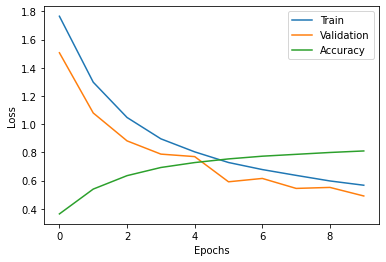

In [25]:
plotloss(history_b)

<a id="saving"></a>
## Saving

In [ ]:
tf.keras.models.save_model(
    model_b,
    "./assets/cifar_tuned.model",
    overwrite=True,
    include_optimizer=True,
)